mcdata_taue2 - сигнал (конфигурации треков, которые мы ищем)
и остальные - это пластины кирпичей с треками фона, который нам неинтересен

и тогда для чтения треков одной из пластин будет достаточно использовать команду 

backtracks = root_numpy.root2array("129294.{p}.1.1000.cp.root".format(p=48), 
                                       treename="couples", 
                                       branches=["s.eX", "s.eY", "s.eZ",
                                                "s.eTX", "s.eTY",
                                                "s.eChi2"], step=1000)
                                                
чтение симулированных ливней:

mc = root_numpy.root2array(
                        "mcdata_taue2.root",
                        treename="Data",
                        branches=["Event_id", "ele_P",
                                   "BT_X", "BT_Y", "BT_Z",
                                   "BT_SX", "BT_SY",
                                   "ele_x", "ele_y", "ele_z", 
                                   "ele_sx", "ele_sy", 
                                   "chisquare"])
                                   
https://github.com/yandexdataschool/darkmatter-2017/

https://github.com/yandexdataschool/darkmatter-2017/milestone/1

In [1]:
import ROOT
import root_numpy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# %matplotlib notebook

In [2]:
!ls ../data-2016/

129294.48.1.1000.cp.root  129294.52.1.1000.cp.root  129294.56.1.1000.cp.root
129294.49.1.1000.cp.root  129294.53.1.1000.cp.root  129294.57.1.1000.cp.root
129294.50.1.1000.cp.root  129294.54.1.1000.cp.root  mcdata_taue2.root
129294.51.1.1000.cp.root  129294.55.1.1000.cp.root


In [2]:
backtracks = []
for i in range(10):
    backtracks.append(root_numpy.root2array("../data-2016/129294.{p}.1.1000.cp.root".format(p=48+i), 
                                       treename="couples", 
                                       branches=["s.eX", "s.eY", "s.eZ",
                                                "s.eTX", "s.eTY",
                                                "s.eChi2"], step=1000))

TClass::Init:0: RuntimeWarning: no dictionary for class EdbPoint2D is available
TClass::Init:0: RuntimeWarning: no dictionary for class EdbPoint is available
TClass::Init:0: RuntimeWarning: no dictionary for class EdbTrack2D is available
TClass::Init:0: RuntimeWarning: no dictionary for class EdbAngle2D is available
TClass::Init:0: RuntimeWarning: no dictionary for class EdbSegCouple is available
TClass::Init:0: RuntimeWarning: no dictionary for class EdbSegP is available
TClass::Init:0: RuntimeWarning: no dictionary for class EdbID is available


dtype=[('s.eX', '<f8'), ('s.eY', '<f8'), ('s.eZ', '<f8'), ('s.eTX', '<f8'), ('s.eTY', '<f8'), ('s.eChi2', '<f8')]

s.eX, s.eY, s.eZ - координаты начала base-track'а

s.eTX, s.eTY - углы в проекциях на две плоскости OZX и OZY

s.eChi2 - то, насколько хорошо выстраиваются точки, оставленные заряженной частицей в фотоэмульсии, в один отрезок (чем меньше, тем лучше)

Габариты кирпичей: x y z: 12.4 9.9 7.5 (см) по каждой из осей

Данные в микрометрах и радианах

plate['s.eZ'] = p * 1293, где p - 48,...,57

In [5]:
h = 1293

In [40]:
X = []
Y = []
for i in range(len(backtracks)):
    X.append([])
    Y.append([])
    for params in backtracks[i]:
        X[i].append(params[0])
        Y[i].append(params[1])

In [41]:
for i in range(len(backtracks)):
    print(min(X[i]), max(X[i]))
    print(min(Y[i]), max(Y[i]))
    print()

28503.1601562 71552.65625
3608.61474609 76222.546875

28643.8535156 71364.609375
4154.10498047 76348.3515625

29057.6445312 71591.015625
4242.38183594 76386.9765625

28657.0546875 71379.25
4707.25830078 75840.015625

28473.2382812 71599.3828125
4592.15380859 76207.46875

28667.6425781 71340.78125
3775.95507812 76399.078125

28794.2929688 71984.390625
3778.36499023 76075.453125

28487.5253906 71612.484375
3514.80932617 76514.9609375

28672.1132812 71390.7265625
3685.64160156 76155.109375

12157.1035156 113151.75
9680.08398438 90608.0



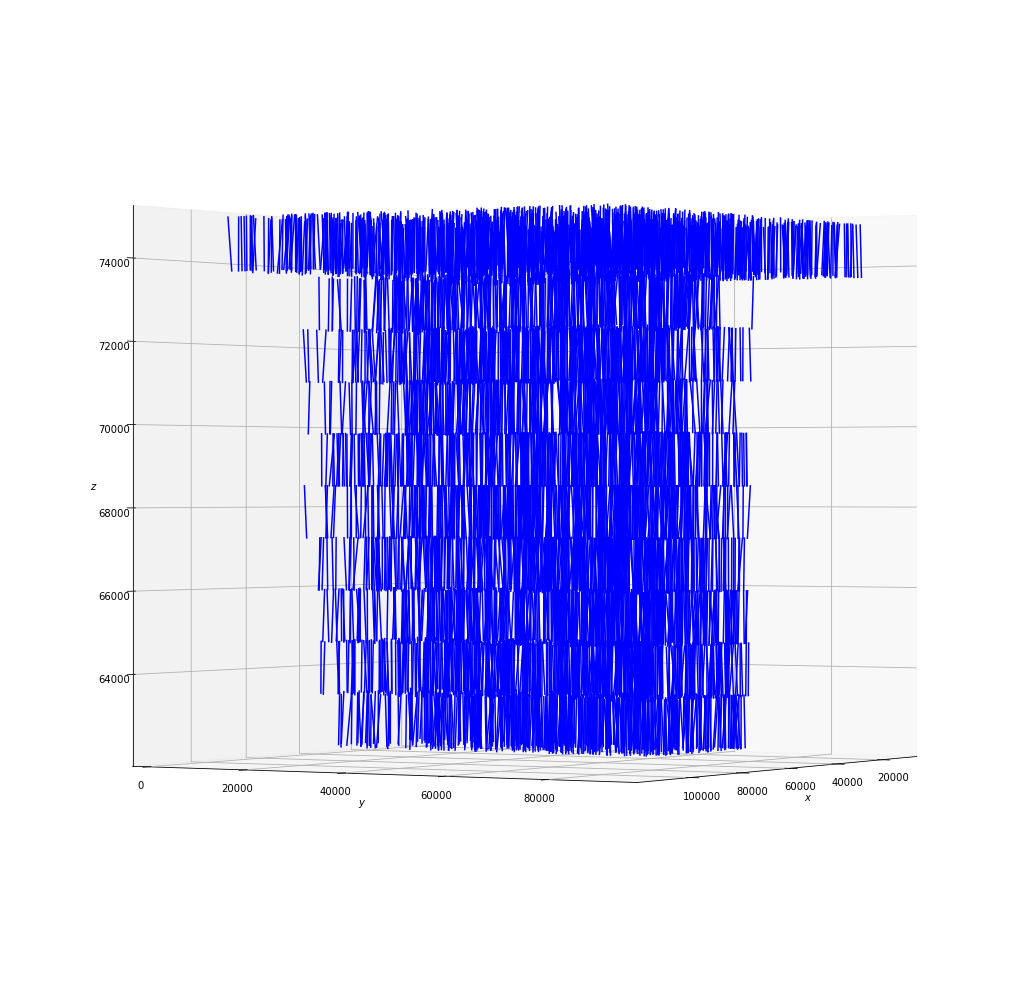

In [9]:
fig = plt.figure(figsize=(40,18))
ax = fig.add_subplot(122, projection='3d')
for i in range(len(backtracks)):
    for param in backtracks[i]:
        x = [param[0], np.tan(param[3]) * h + param[0]]
        y = [param[1], np.tan(param[4]) * h + param[1]]
        z = [h * (48 + i), h * (49 + i)]
        ax.plot(x, y, z, 'b')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(0, 31)
plt.show()

In [3]:
mc = root_numpy.root2array("../data-2016/mcdata_taue2.root",
                        treename="Data",
                        branches=["BT_X", "BT_Y", "BT_Z",
                                   "BT_SX", "BT_SY",
                                   "chisquare"])

dtype=[('BT_X', 'O'), ('BT_Y', 'O'), ('BT_Z', 'O'), ('BT_SX', 'O'), ('BT_SY', 'O'), ('chisquare', 'O')]

BT_X == s.eX, BT_Y == s.eY, BT_Z == s.eZ, BT_SX == s.eTX, BT_SY == s.eTY, chisquare == s.eChi2

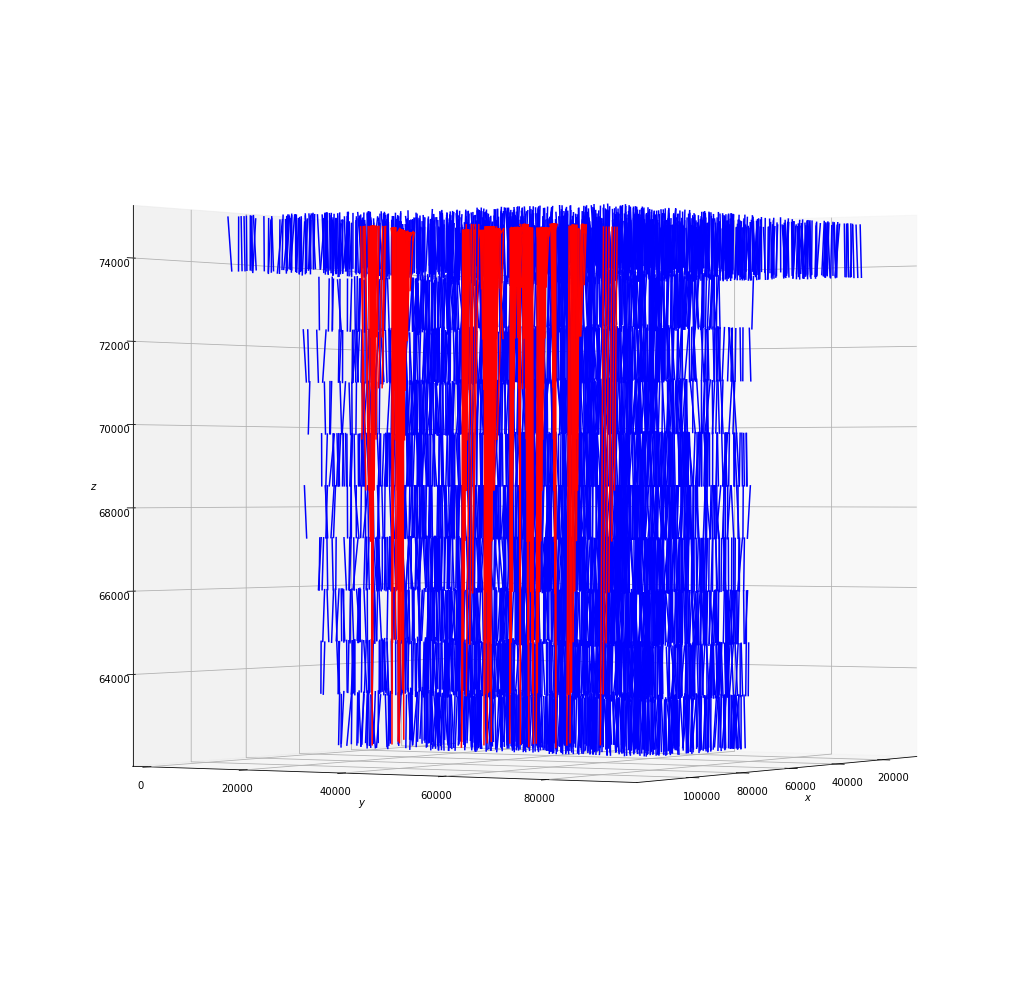

In [7]:
fig = plt.figure(figsize=(40,18))
ax = fig.add_subplot(122, projection='3d')
for i in range(len(backtracks)):
    for param in backtracks[i]:
        x = [param[0], np.tan(param[3]) * h + param[0]]
        y = [param[1], np.tan(param[4]) * h + param[1]]
        z = [h * (48 + i), h * (49 + i)]
        ax.plot(x, y, z, 'b')
for i in range(200):
    if len(mc[i][2]):
        hmin = h * 48 - min(mc[i][2])
    for j in range(len(mc[i][0])):
        if (mc[i][2][j] + hmin <= h * 58 
            and 28473.2382812 <= mc[i][0][j] <= 71340.78125 
            and 3514.80932617 <= mc[i][1][j] <= 75840.015625):
            x = [mc[i][0][j], np.tan(mc[i][3][j]) * h + mc[i][0][j]]
            y = [mc[i][1][j], np.tan(mc[i][4][j]) * h + mc[i][1][j]]
            z = [mc[i][2][j] + hmin, h * 58]
            ax.plot(x, y, z, 'r')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(0, 31)
plt.show()

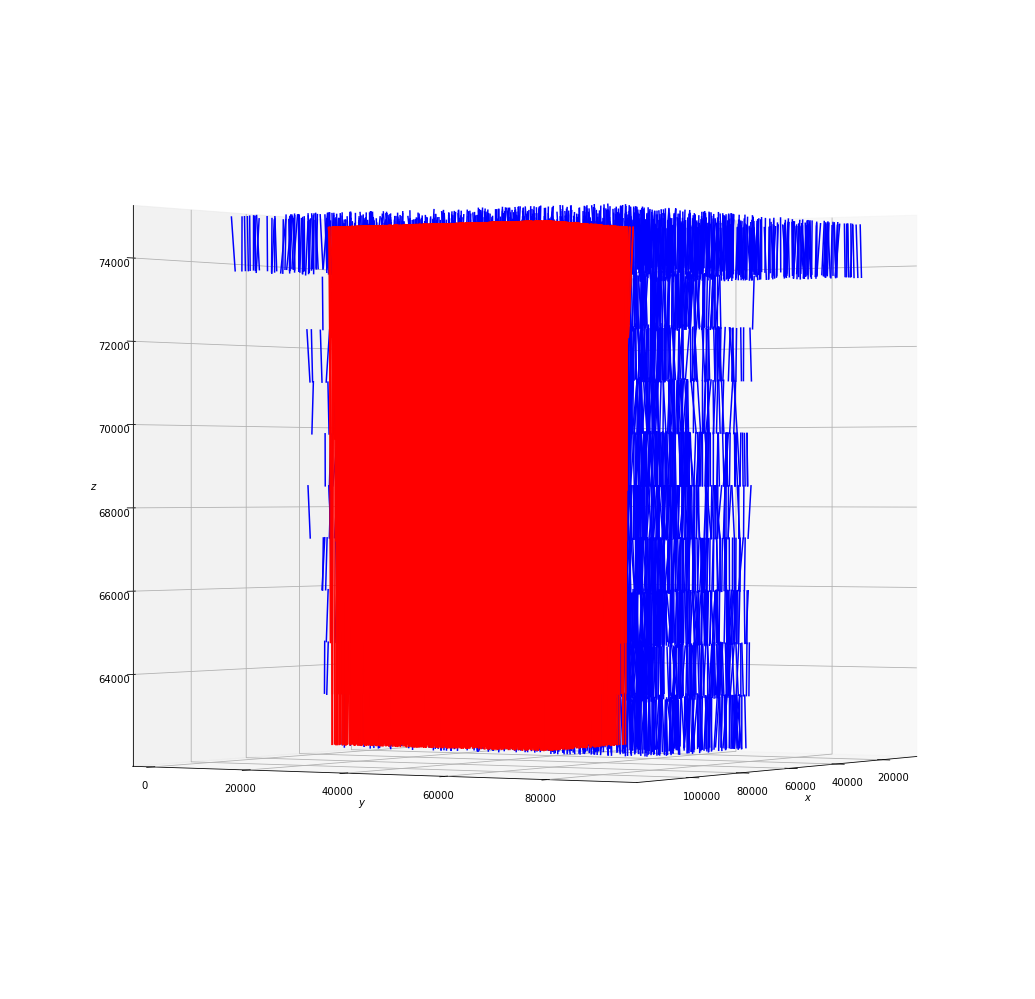

In [44]:
fig = plt.figure(figsize=(40,18))
ax = fig.add_subplot(122, projection='3d')
for i in range(len(backtracks)):
    for param in backtracks[i]:
        x = [param[0], np.tan(param[3]) * h + param[0]]
        y = [param[1], np.tan(param[4]) * h + param[1]]
        z = [h * (48 + i), h * (49 + i)]
        ax.plot(x, y, z, 'b')
for i in range(len(mc)):
    if len(mc[i][2]):
        hmin = h * 48 - min(mc[i][2])
    for j in range(len(mc[i][0])):
        if (mc[i][2][j] + hmin <= h * 58 
            and 28473.2382812 <= mc[i][0][j] <= 71340.78125 
            and 3514.80932617 <= mc[i][1][j] <= 75840.015625):
            x = [mc[i][0][j], np.tan(mc[i][3][j]) * h + mc[i][0][j]]
            y = [mc[i][1][j], np.tan(mc[i][4][j]) * h + mc[i][1][j]]
            z = [mc[i][2][j] + hmin, h * 58]
            ax.plot(x, y, z, 'r')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(0, 31)
plt.show()

In [24]:
summ = 0
for j in range(len(mc)):
    summ += len(mc[j][0])
print(summ)

5710824
